In [1]:
from UQpy.surrogates import Kriging
from UQpy.utilities.strata import Rectangular
from UQpy.sampling import StratifiedSampling, MonteCarloSampling
from UQpy.RunModel import RunModel
from UQpy.distributions import Uniform
import numpy as np
import matplotlib.pyplot as plt

The selected optimizer method does not support bounds and thus will be ignored.
The selected optimizer method does not support bounds and thus will be ignored.


In [2]:
marginals = [Uniform()]

In [3]:
strata = Rectangular(strata_number=[10])

In [4]:
x = StratifiedSampling(distributions=marginals, strata_object=strata,
                       samples_per_stratum_number=1, random_state=2)

In [5]:
def func(x):
    return 1/(1+(10*x)**4)+0.5*np.exp(-100*(x-0.5)**2)

In [6]:
samples = x.samples.copy()
output = np.zeros([x.samples.shape[0], 1])
for j in range(x.samples.shape[0]):
    output[j, 0] = func(x.samples[j, 0])

In [7]:
from UQpy.surrogates.kriging.regression_models import Linear
from UQpy.surrogates.kriging.correlation_models import Gaussian

from UQpy.utilities.optimization.MinimizeOptimizer import MinimizeOptimizer
from UQpy.surrogates.kriging.constraints.Nonnegative import Nonnegative
optimizer = MinimizeOptimizer(method="SLSQP", bounds = [[0.1, 10]])

K = Kriging(regression_model=Linear(), correlation_model=Gaussian(), optimizer= optimizer,
            optimizations_number=20, correlation_model_parameters=[1], random_state=2, 
            optimize_constraints=Nonnegative(np.linspace(min(x.samples), max(x.samples), 100))
           )
K.fit(samples=samples, values=output)
print(K.correlation_model_parameters)

/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


[3.68004775]


In [8]:
num = 1000
x1 = np.linspace(min(x.samples), max(x.samples), num)

y, y_sd = K.predict(x1.reshape([num, 1]), return_std=True)
y_grad = K.jacobian(x1.reshape([num, 1]))

y_act = np.zeros([num, 1])
for i in range(num):
    y_act[i, 0] = func(x1[i, 0])

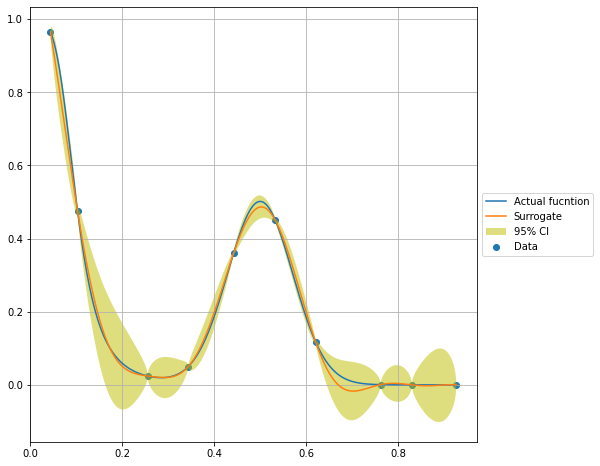

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
plt.plot(x1, y_act, label='Actual fucntion')
plt.plot(x1, y, label='Surrogate')
# plt.plot(x1, y_grad, label='Gradient')
plt.scatter(K.samples, K.values, label='Data')
plt.fill(np.concatenate([x1, x1[::-1]]), np.concatenate([y - 1.9600 * y_sd,
                                                         (y + 1.9600 * y_sd)[::-1]]),
         alpha=.5, fc='y', ec='None', label='95% CI')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

In [10]:
from UQpy.surrogates.kriging.constraints import Nonnegative
mcs = MonteCarloSampling(distributions=marginals, samples_number=30, random_state=20)
nonnegative = Nonnegative(candidate_points=mcs.samples)

In [11]:
optimizer = MinimizeOptimizer(method="Newton-CG", bounds = [[0.1, 10]])

K1 = Kriging(regression_model=Linear(), correlation_model=Gaussian(), optimize_constraints=nonnegative,
             optimizations_number=20, correlation_model_parameters=[1], random_state=2, optimizer= optimizer)
K1.fit(samples=samples, values=output)
print(K1.correlation_model_parameters)

[3.68009423]


/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/scipy/optimize/_minimize.py:538: RuntimeWarning: Method Newton-CG cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,
/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/scipy/optimize/_minimize.py:538: RuntimeWarning: Method Newton-CG cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,
/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/scipy/optimize/_minimize.py:538: RuntimeWarning: Method Newton-CG cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,
/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/scipy/optimize/_minimize.py:538: RuntimeWarning: Method Newton-CG cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


In [12]:
y1, y1_sd = K1.predict(x1.reshape([num, 1]), return_std=True)
y1_grad = K1.jacobian(x1.reshape([num, 1]))

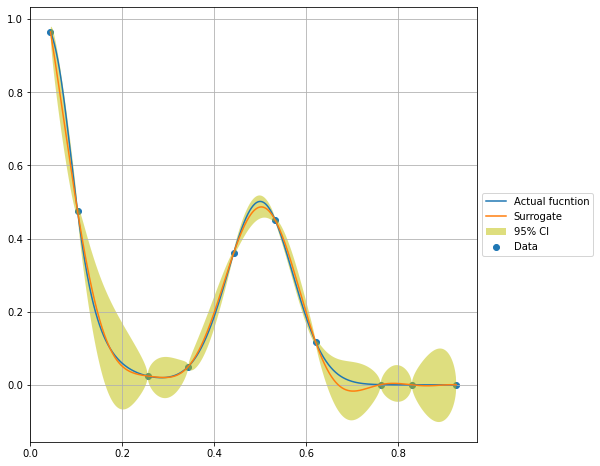

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
plt.plot(x1, y_act, label='Actual fucntion')
plt.plot(x1, y1, label='Surrogate')
# plt.plot(x1, y1_grad, label='Gradient')
plt.scatter(K1.samples, K1.values, label='Data')
plt.fill(np.concatenate([x1, x1[::-1]]), np.concatenate([y1 - 1.9600 * y1_sd,
                                                         (y1 + 1.9600 * y1_sd)[::-1]]),
         alpha=.5, fc='y', ec='None', label='95% CI')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

In [14]:
optimizer = MinimizeOptimizer(method="COBYLA", bounds = [[0.01, 10]])

K2 = Kriging(regression_model=Linear(), correlation_model=Gaussian(), optimize_constraints=nonnegative,
             optimizations_number=20, correlation_model_parameters=[1], random_state=2, optimizer= optimizer)
K2.fit(samples=samples, values=output)
print(K2.correlation_model_parameters)

/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/scipy/optimize/_minimize.py:544: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,


[3.68003147]


In [15]:
y2, y2_sd = K2.predict(x1.reshape([num, 1]), return_std=True)
y2_grad = K2.jacobian(x1.reshape([num, 1]))

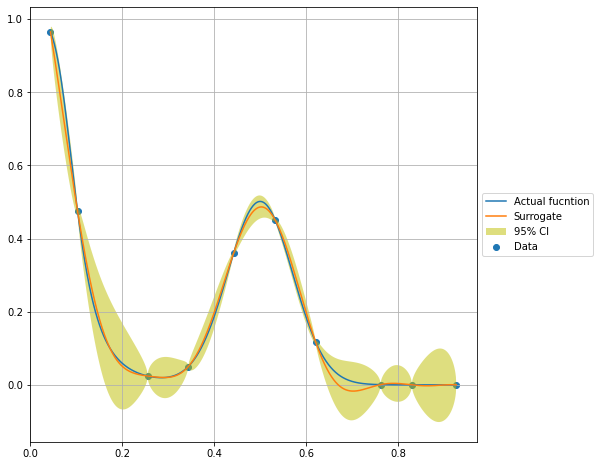

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
plt.plot(x1, y_act, label='Actual fucntion')
plt.plot(x1, y2, label='Surrogate')
# plt.plot(x1, y2_grad, label='Gradient')
plt.scatter(K2.samples, K2.values, label='Data')
plt.fill(np.concatenate([x1, x1[::-1]]), np.concatenate([y2 - 1.9600 * y2_sd,
                                                         (y2 + 1.9600 * y2_sd)[::-1]]),
         alpha=.5, fc='y', ec='None', label='95% CI')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

In [17]:
for i in range(mcs.samples.shape[0]):
    tmp2, tmp2_sd = K2.predict(mcs.samples[i,:].reshape(-1, 1), return_std=True)
    print(tmp2 - 2*tmp2_sd)

[0.21172689]
[-0.10064529]
[-0.10317808]
[-0.03979201]
[0.95670807]
[-0.0970482]
[0.08279498]
[0.4544618]
[-0.04381854]
[-0.06754857]
[-0.02568274]
[-0.08790848]
[-0.041144]
[-0.06481158]
[-0.03398893]
[0.95503528]
[0.30264301]
[-0.03794523]
[-0.02826979]
[0.01943797]
[-0.07731219]
[-0.15267862]
[0.32641933]
[-0.04834797]
[-0.02733664]
[0.44863586]
[0.05471856]
[-0.04160455]
[0.39594249]
[0.45310261]
